In [47]:
from langgraph.graph import StateGraph, START , END
from typing import TypedDict, Annotated , List
from pydantic import BaseModel , Field
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage , BaseMessage ### all the Messages like system message, Ai meassages are inherited from BAse message... 
import os
import operator
from langgraph.graph.message import add_messages ### Reducer... similar to oprerator
from langgraph.checkpoint.memory import MemorySaver

In [48]:
### Model Definition:
model=ChatGroq(
    model="llama-3.1-8b-instant",
    api_key=os.getenv("API_KEY")
)

In [49]:
### State Defintion:
class ChatState(TypedDict):
    messages:Annotated[List[BaseMessage],add_messages]

In [50]:
def llm_chat(state:ChatState):
    message=state['messages']
    response=model.invoke(message)
    return {'messages':response}

In [51]:
### Defining Graph:
check_pointer=MemorySaver()
graph=StateGraph(state_schema=ChatState)

### Adding Nodes:
graph.add_node("llm_chat",llm_chat)

### Adding Edges:
graph.add_edge(START,"llm_chat")
graph.add_edge('llm_chat',END)

### Compiling Graph:
workflow=graph.compile(checkpointer=check_pointer)


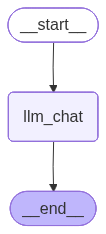

In [52]:
workflow

In [ ]:
### ChatBot Feeling:
thread_id='1'

while True:

    user_message=input("Enter Here!")
    print('User:',user_message)

    if user_message.strip().lower() in ['exit','quit','bye']:
        break
    configuration={'configurable':{'thread_id':thread_id}}
    response=workflow.invoke({"messages":[HumanMessage(content=user_message)]},config=configuration)  ##### SINCE INVOKE IS CALLED EVERYTIME THE LOOP IS REITEARTED IT WILL FRESH UP THE STATES EACH TIME WITH NO PREVIOUS DATA #####
    print('AI:',response['messages'][-1].content)

####################################### BUT IT DOESNT HAVE MEMORY ##################################### BUT ITS CONFIG THAT GIVES THE MEMORY TO THIS CHATBOT ##############################

User: hey My name is Yash
AI: Nice to meet you again, Yash. It looks like we had a conversation earlier. How are you doing today?
User: Ok what is the capital of india?
AI: The capital of India is New Delhi. It is the country's largest metropolis and a major cultural hub, serving as the seat of the central government.
User: Ok now tell me my name
AI: Your name is Yash.
User: Ok what is 10+30
AI: 10 + 30 = 40
User: So which country capital did i asked  You earlier?
AI: You asked about the capital of India earlier.
User: Ok and What calculattion did i asked you to do?
AI: You asked me to do a simple arithmetic calculation: 10 + 30.
User: ok tell me my name again??
AI: Your name is Yash.
User: quit
